In [1]:
import pandas as pd
df = pd.read_csv('green_tripdata_2015-09__cleaned.csv')

In [2]:
# 4. Tip Percentage

In [3]:
df['tip_percent'] = df['Tip_amount'] / (df['Total_amount']) * 100

In [4]:
df.Payment_type.groupby(df['Payment_type']).count()

Payment_type
1    685131
2    755750
3      2446
4      2914
5        48
Name: Payment_type, dtype: int64

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import math

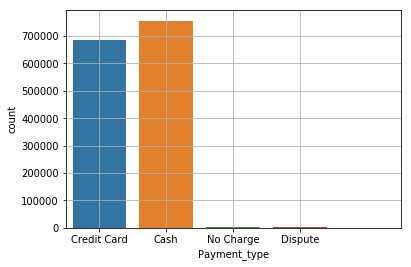

In [6]:
sns.countplot(x = 'Payment_type', data = df)
plt.grid()
plt.xticks([0,1,2,3], ['Credit Card', 'Cash', 'No Charge', 'Dispute'])
plt.show()

In [7]:
df[~(df.Payment_type == 1)].shape[0] / df.shape[0]

0.5262834744646471

In [8]:
df = df[(df.Payment_type == 1)]

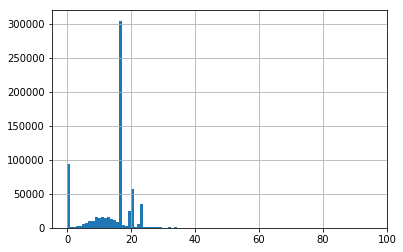

In [9]:
a = plt.hist(df.tip_percent, bins=100)
plt.grid()

In [10]:
q95 = np.percentile(df.tip_percent, 99.9)
q95
df = df[df.tip_percent < q95]

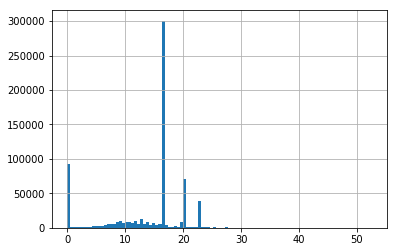

In [11]:
a = plt.hist(df.tip_percent, bins=100)
plt.grid()

In [12]:
df['Tipped'] = 0
df['Tipped'][df.tip_percent > 0] = 1

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
df.Tipped.groupby(df.Tipped).count()

Tipped
0     91136
1    593309
Name: Tipped, dtype: int64

In [14]:
df.drop('Lpep_pickup_datetime', axis=1, inplace=True)
df.drop('Lpep_dropoff_datetime', axis=1, inplace=True)
df.drop('Pickup_longitude', axis=1, inplace=True)
df.drop('Pickup_latitude', axis=1, inplace=True)
df.drop('Dropoff_longitude', axis=1, inplace=True)
df.drop('Dropoff_latitude', axis=1, inplace=True)

In [15]:
df['VendorID'] = df['VendorID'].astype('category')
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].astype('category')
df['RateCodeID'] = df['RateCodeID'].astype('category')
df['Payment_type'] = df['Payment_type'].astype('category')
df['Trip_type'] = df['Trip_type'].astype('int').astype('category')
df['Airport'] = df['Airport'].astype('category')

df['Pickup_loc'] = df['Pickup_loc'].astype('category')
df['Dropoff_loc'] = df['Dropoff_loc'].astype('category')

In [16]:
df['VendorID'] = df['VendorID'].cat.codes.astype('category')
df['Store_and_fwd_flag'] = df['Store_and_fwd_flag'].cat.codes.astype('category')
df['RateCodeID'] = df['RateCodeID'].cat.codes.astype('category')
df['Payment_type'] = df['Payment_type'].cat.codes.astype('category')
df['Trip_type'] = df['Trip_type'].cat.codes.astype('int').astype('category')
df['Airport'] = df['Airport'].cat.codes.astype('category')

df["Pickup_loc"] = df["Pickup_loc"].cat.codes.astype('category')
df["Dropoff_loc"] = df["Dropoff_loc"].cat.codes.astype('category')

In [17]:
from sklearn.model_selection import train_test_split

X = df[['VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_trip_duration',
       'log_avg_speed_mph',
       'cos_time_of_day', 'sin_time_of_day', 'Airport'
        , 'Pickup_loc', 'Dropoff_loc'
       ]]
y = df['tip_percent']
yc = df.Tipped

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

In [26]:
# Test options and evaluation metric
seed = 7
scoring = 'mean_square_error'

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('GNB', GaussianNB()))
models.append(('NN', MLPRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.077362 (0.005241)
RF: 0.875001 (0.002235)


KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [39]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [31]:
parameter_candidates = [
  {'n_estimators': [1, 10]},
]

In [42]:
clf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameter_candidates, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [37]:
print('Best score:', clf.best_score_) 

print('Best parameters:',clf.best_params_) 

Best score: 0.8687240958295936
Best parameters: {'n_estimators': 10}


In [145]:
m = RandomForestRegressor()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.9777794522300575

In [147]:
y_pred = m.predict(X_test)
y_test2 = y_test.values

print( mean_squared_error(y_test2, y_pred) , m.score(X_test, y_test) )

5.789461123179419 0.8809685942608279


In [97]:
compare = pd.DataFrame({'test': y_test2, 'pred': y_pred})
compare.head(10)

,pred,test
51,4.058823,0.0
70,0.682636,0.0
74,0.000000,0.0
81,2.234083,0.0
88,0.000000,0.0
94,0.000000,0.0
98,7.547170,0.0
101,1.066774,0.0
102,0.000000,0.0
104,4.957153,0.0


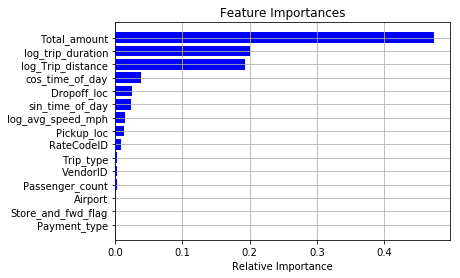

In [148]:
features = X.columns
importances = m.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.show()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size=0.3)

In [ ]:
# Test options and evaluation metric
seed = 7
scoring = 'mean_square_error'

# Spot Check Algorithms
models = []
# models.append(('LR', LinearRegression()))
models.append(('RF', RandomForestClassifier()))
# models.append(('GB', GradientBoostingRegressor()))
# models.append(('CART', DecisionTreeRegressor()))
# models.append(('SVM', SVR()))
# models.append(('NN', MLPRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [102]:
m = RandomForestClassifier()
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.9983031072131511

In [103]:
y_pred = m.predict(X_test)
y_test2 = y_test.values

print( mean_squared_error(y_test2, y_pred) , m.score(X_test, y_test) )

0.05233911578209162 0.9476608842179084


In [104]:
compare = pd.DataFrame({'test': y_test2, 'pred': y_pred})
compare.head(10)

,pred,test
0,1,0
1,1,1
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,0
8,1,1
9,1,1


In [106]:
X = X[yc == 1]
y = y[yc == 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [107]:
m = RandomForestRegressor()
m.fit(X_train, y_train)
m.score(X_train, y_train) 

0.9637057050844007

In [108]:
y_pred = m.predict(X_test)
y_test2 = y_test.values

print( mean_squared_error(y_test2, y_pred) , m.score(X_test, y_test) )

4.182229742351384 0.7988892301929966


In [ ]:
compare = pd.DataFrame({'test': y_test2, 'pred': y_pred})
compare.head(10)

In [100]:
df_1 = df[df.Tipped == 1].sample(len(df[df.Tipped == 0]), replace=False)

df_bal = pd.concat([df_1, df[df.Tipped == 0]])

In [101]:
df_bal.Tipped.groupby(df_bal.Tipped).count()

Tipped
0    91136
1    91136
Name: Tipped, dtype: int64

In [102]:
df.columns

Index(['VendorID', 'Store_and_fwd_flag', 'RateCodeID', 'Passenger_count',
       'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax', 'Tip_amount',
       'Tolls_amount', 'improvement_surcharge', 'Total_amount', 'Payment_type',
       'Trip_type', 'log_Trip_distance', 'log_Trip_distance_norm',
       'trip_duration', 'log_trip_duration', 'log_trip_duration_norm',
       'avg_speed_mph', 'log_avg_speed_mph', 'log_avg_speed_mph_norm',
       'time_of_day', 'time_of_day_hour', 'time_of_day_hour_sec',
       'cos_time_of_day', 'sin_time_of_day', 'Airport', 'Pickup_loc',
       'Dropoff_loc', 'tip_percent', 'Tipped'],
      dtype='object')

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X_bal = df_bal[['VendorID', 'Store_and_fwd_flag', 'RateCodeID',
       'Passenger_count', 'Total_amount',
       'Payment_type', 'Trip_type', 'log_Trip_distance',
       'log_trip_duration',
       'log_avg_speed_mph',
       'cos_time_of_day', 'sin_time_of_day', 'Airport',
       'Pickup_loc', 'Dropoff_loc']]
y_bal = df_bal['Tipped']

In [104]:
m = LogisticRegression()
m.fit(X_bal, y_bal)
m.score(X_bal, y_bal)

0.6535287921348315

In [105]:
m = RandomForestClassifier()
m.fit(X_bal, y_bal)
m.score(X_bal, y_bal)

0.9962967433286517

In [106]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split

In [118]:
X_bal_train, X_bal_test, y_bal_train, y_bal_test = train_test_split(X_bal, y_bal, test_size=0.3)

In [120]:
# Test options and evaluation metric
seed = 7

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('NN', MLPClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_bal, y_bal, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.476777 (0.087303)
RF: 0.891679 (0.033297)
GB: 0.873305 (0.010119)
CART: 0.926747 (0.002575)
KNN: 0.692772 (0.018621)
GNB: 0.501515 (0.438554)
NN: 0.784800 (0.156024)


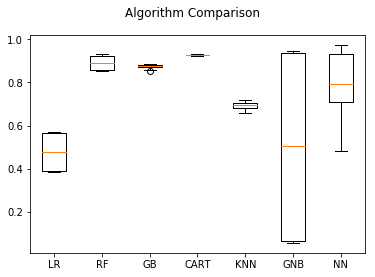

In [121]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
y_pred = y_test.copy()
y_pred[y_pred == y_pred] = 0

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
preds = y_pred
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
m = LogisticRegression()

m.fit(X_train, y_train)

y_pred = y_test.copy()
y_pred[y_pred == y_pred] = 0

y_pred[m.predict_proba(X_test)[:, 1] > 0.8] = 1

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

In [ ]:
m

In [ ]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = m.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
m = SVC()

m.fit(X_train, y_train)

y_pred = m.predict(X_test)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = m.predict_proba(X_test)

preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fpr, tpr, threshold

In [ ]:
probs = m.predict_proba(X)
preds = probs[:,1]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
y_pred = [df.tip_percent.mean()] * len(y_test)

mean_squared_error(y_test, y_pred)
# r2_score(y_test, y_pred)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

In [ ]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

In [ ]:
y_res = y_test - y_pred

plt.scatter(y_pred, y_res)

In [ ]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = np.random.normal(loc = 0, scale = 5, size=100)   
stats.probplot(y_res, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns,
                class_names = df.tip_percent,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test), mean_squared_error(y_test, y_pred))

In [ ]:
model.predict( X.iloc[800].reshape(1, -1) )

In [ ]:
y.iloc[800]

In [ ]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

feature_importances

In [ ]:
df.tip_percent.mean()

In [ ]:
import statsmodels.api as sm

X2_train = sm.add_constant(X_train)

m = sm.OLS(y_train, X2_train).fit()

m.summary()

In [ ]:
plt.scatter(m.predict(X2_train), m.resid, s=0.1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
model.coef_

In [ ]:
# Necessary imports: 
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

In [ ]:
scores = cross_val_score(model, X_train, y_train, cv=10)

scores.mean()